In [87]:
import pandas as pd
import cv2
from utils.imageprocessing import *

In [88]:
df_codis_info = pd.read_csv("data/codis_info.csv")

In [89]:
df_codis_info.head()

,name,color1_ratio,color1_R,color1_G,color1_B,color2_ratio,color2_R,color2_G,color2_B,color3_ratio,color3_R,color3_G,color3_B
0,395456,0.552068,19.347484,74.598975,101.897819,0.333003,118.263815,136.837699,161.962385,0.114928,225.595962,231.418573,234.083715
1,395457,0.366889,235.853713,237.499254,243.467044,0.354360,9.325768,49.415161,111.804539,0.278750,111.723454,129.031600,134.944259
2,395458,0.478984,29.888510,32.705910,34.252413,0.327304,91.135019,114.749914,136.079119,0.193712,242.427326,243.395930,245.615988
3,395459,0.454407,251.017751,250.918482,250.725811,0.333933,39.257884,44.032468,34.898356,0.211660,98.930366,98.529972,67.635901
4,395460,0.438566,125.796515,27.693648,34.216343,0.397761,49.884847,48.377934,50.190314,0.163673,228.921261,229.310303,230.060820


In [90]:
19, 74, 101, 118, 136, 161, 225, 231, 234

(19, 74, 101, 118, 136, 161, 225, 231, 234)

### KNN_codis

In [133]:
def KNN_codis(color1, color2, color3, df_codis_info, debug=False):
    df_codis_rgb = df_codis_info.filter(regex="[RGB]")
    
    color1 = np.array(color1)
    color2 = np.array(color2)
    color3 = np.array(color3)
    color = np.concatenate([color1, color2, color3])
    
    eucliDist = np.linalg.norm(df_codis_rgb - color, axis = 1)
    min_idx = np.argsort(eucliDist)[0]
    similar_codis_id = df_codis_info["name"][min_idx]
    
    codis_color = df_codis_rgb.iloc[min_idx].values
    
    if debug == True:
        print(similar_codis_id)
        print(color)
        print(codis_color)
        bar1 = plot_colors([0.33, 0.33, 0.33], color.reshape(3,3))
        bar2 = plot_colors([0.33, 0.33, 0.33], codis_color.reshape(3,3))
        plt.imshow(bar1)
        plt.axis("off")
        plt.show()
        
        plt.imshow(bar2)
        plt.axis("off")
        plt.show()
        
        img_path = "data/codis/" + str(similar_codis_id) + ".jpg"
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        
        

396307
[100   0 100 255 255 255   0 100 100]
[  27.98119522   30.96924303   36.65418327  237.4918739   237.63226943
  241.00058743   45.83897485   60.80174081   89.92649903]


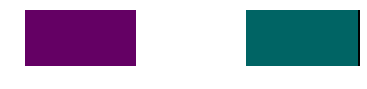

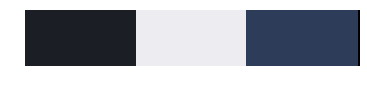

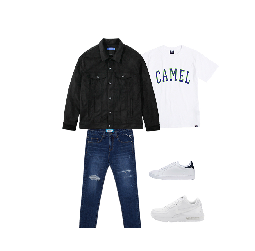

In [138]:
KNN_codis([100, 0, 100], [255, 255, 255], [0, 100, 100], df_codis_info, debug=True)